# Day 3 - Data Science Essentials Program
NAMR - Apr 2024

**Agenda for today**
- Morning
    - Takeup of FF3 model
    - Classification: Logistic Regressions
- Afternoon
    - Classification: Decision Trees
 
**Before we get started**
- open up the `Logistic Regression.ipynb` file

## Take-up Fama French 3 Factor Model

In [1]:
#Step 1 - Import packages and data
import pandas as pd
import statsmodels.api as sm

In [2]:
import matplotlib.pyplot as plt

In [13]:
aapl = pd.read_csv('StockData/AAPL.csv', parse_dates=['Date'], date_format='%m/%d/%y')
# ff3 = pd.read_csv('ExData/ff3_daily.csv', parse_dates=['date'])
ff3 = pd.read_csv('ExData/ff3_daily.csv')

In [15]:
ff3['date'] = pd.to_datetime(ff3['date'], format='%Y%m%d')

In [20]:
# aapl.head()
# ff3.info()
# ff3.head()

In [21]:
aapl['Returns'] = aapl['Adj Close'].pct_change()
aapl['Returns'] *= 100

In [31]:
# aapl['Returns']
data = ff3.merge(aapl, how='inner', left_on='date', right_on='Date')
data['Excess Returns'] = data['Returns'] - data['RF']
# data.tail()

In [33]:
data = data.dropna()

In [37]:
data.head(2)

,date,Mkt-RF,SMB,HML,RF,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Excess Returns
1,2013-10-02,-0.10,-0.37,-0.08,0.0,2013-10-02,69.375717,70.257141,69.107140,69.937141,63.731426,72296000,0.327914,0.327914
2,2013-10-03,-0.88,-0.19,0.20,0.0,2013-10-03,70.072861,70.335716,68.677139,69.058571,62.930801,80688300,-1.256248,-1.256248


In [60]:
data['Const'] = 1
model2 = sm.OLS(data['Excess Returns'], data[['Const','Mkt-RF', 'SMB', 'HML']])
results2 = model2.fit()
results2.summary()

C:\Users\V806013\AppData\Local\Temp\4\ipykernel_100652\546132453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Const'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Excess Returns   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     224.8
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          1.11e-116
Time:                        10:01:44   Log-Likelihood:                -1951.3
No. Observations:                1258   AIC:                             3911.
Df Residuals:                    1254   BIC:                             3931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const          0.0491      0.032      1.519      0.129      -0.014       0.112
Mkt-RF         1.0091      0.041     24.502      0.000       0.928       1.090
SMB           -0.2567      0.065     -3.923      0.000      -0.385      -0.128
HML           -0.5526      0.067     -8.201      0.000      -0.685      -0.420
==============================================================================
Omnibus:                      227.104   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3618.842
Skew:                           0.318   Prob(JB):                         0.00
Kurtosis:                      11.285   Cond. No.                         2.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
from sklearn.metrics import mean_absolute_error,  mean_squared_error

In [61]:
model = sm.OLS(data['Excess Returns'], data[['Mkt-RF', 'SMB', 'HML']])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Excess Returns   R-squared (uncentered):                   0.352
Model:                            OLS   Adj. R-squared (uncentered):              0.351
Method:                 Least Squares   F-statistic:                              227.6
Date:                Thu, 04 Apr 2024   Prob (F-statistic):                   6.91e-118
Time:                        10:01:51   Log-Likelihood:                         -1952.5
No. Observations:                1258   AIC:                                      3911.
Df Residuals:                    1255   BIC:                                      3926.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.0133      0.041     24.647      0.000       0.933       1.094
SMB           -0.2589      0.065     -3.954      0.000      -0.387      -0.130
HML           -0.5551      0.067     -8.237      0.000      -0.687      -0.423
==============================================================================
Omnibus:                      227.246   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3620.127
Skew:                           0.319   Prob(JB):                         0.00
Kurtosis:                      11.286   Cond. No.                         1.79
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
data['Predict wo int'] = results.predict(data[['Mkt-RF', 'SMB', 'HML']])
data['Predict w int'] = results2.predict(data[['Const','Mkt-RF', 'SMB', 'HML']])

C:\Users\V806013\AppData\Local\Temp\4\ipykernel_100652\2950803465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predict wo int'] = results.predict(data[['Mkt-RF', 'SMB', 'HML']])
C:\Users\V806013\AppData\Local\Temp\4\ipykernel_100652\2950803465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predict w int'] = results2.predict(data[['Const','Mkt-RF', 'SMB', 'HML']])


In [63]:
mas = mean_absolute_error(data['Excess Returns'], data['Predict wo int'])
mse = mean_squared_error(data['Excess Returns'], data['Predict wo int'])
mas, mse

(0.7883910480897249, 1.305032040500066)

In [69]:
results.scale #MSE

1.3081516390032537

In [67]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.351    
Dependent Variable:     Excess Returns   AIC:                         3910.9637
Date:                   2024-04-04 10:02 BIC:                         3926.3755
No. Observations:       1258             Log-Likelihood:              -1952.5  
Df Model:               3                F-statistic:                 227.6    
Df Residuals:           1255             Prob (F-statistic):          6.91e-118
R-squared (uncentered): 0.352            Scale:                       1.3082   
------------------------------------------------------------------------------------
             Coef.       Std.Err.         t         P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
Mkt-RF       1.0133        0.0411      24.6468      0.0000       0.9327       1.0940
SMB         -0.2589        0.0655      -3.9543      0.0001      -0.3873      -0.1304
HML         -0.5551        0.0674      -8.2374      0.0000      -0.6874      -0.4229
-------------------------------------------------------------------------------
Omnibus:                 227.246           Durbin-Watson:              1.958   
Prob(Omnibus):           0.000             Jarque-Bera (JB):           3620.127
Skew:                    0.319             Prob(JB):                   0.000   
Kurtosis:                11.286            Condition No.:              2       
===============================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""

**Coffee break until 10:15am EST**
- when you're back from coffee, go ahead and import the packages and data from Logistic Regression file

## Logistic Regression

In [75]:
import os #package to access folders/files

#data manipulation
import numpy as np #array/matrix manipulation
import pandas as pd

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#ML - Forecasting Models
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

#metrics to determine how good the model is
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

### Intuition behind the sigmoid function

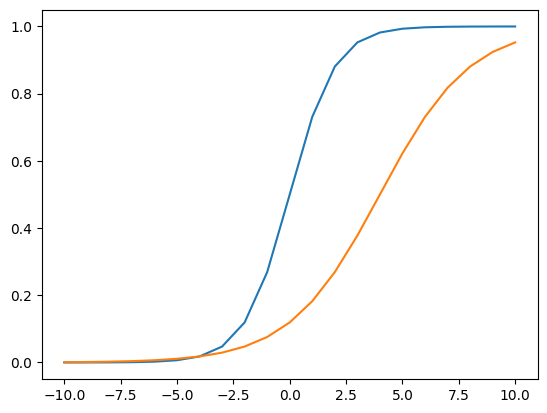

In [93]:
x = np.arange(-10,11,1)
y = 1 / (1 + np.exp(-x))
y2 = 1 / (1 + np.exp(-x * 0.5 + 2))
y3 = expit(0.5 * x - 2) # same as y2
plt.plot(x, y)
plt.plot(x, y2)

## Log Regression on Exams Data Set

In [73]:
df = pd.read_csv("ExData/score.csv")

In [98]:
#Add a column for the Outcome (if score >=50, 1, score<50, 0)
# def createOutcome(x):
#     if x >=50:
#         return 1
#     else:
#         return 0
df['Outcome'] = df['Scores'].apply(lambda x: 1 if x >=50  else 0)
# df.sort_values('Scores')

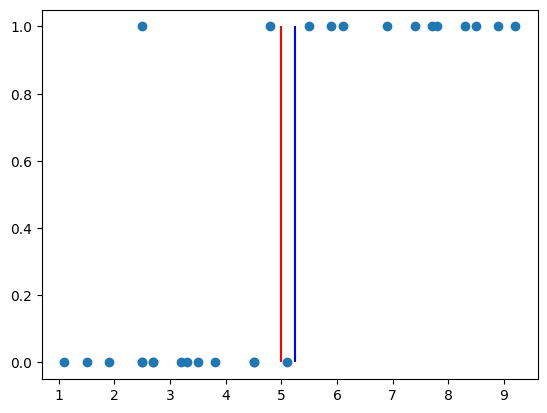

In [102]:
plt.scatter(df['Hours'], df['Outcome'])
plt.vlines(5, ymin=0, ymax=1, color='r')
plt.vlines(5.25, ymin=0, ymax=1, color='b')
plt.show()

In [107]:
type(df['Hours']) #1-d array, series

pandas.core.series.Series

In [106]:
type(df[['Hours']]) #2-d array, dataframe

pandas.core.frame.DataFrame

In [108]:
X = df[['Hours']]  #X variables HAS to be a 2-d matrix, so use [[]]
y = df['Outcome']

In [111]:
clf = LogisticRegression(random_state=0)
    #clf is short for classifier model, you can call this what you want, e.g. model
clf.fit(X, y)

LogisticRegression(random_state=0)

In [112]:
clf.coef_, clf.intercept_ # beta1, beta0

(array([[1.13737908]]), array([-5.50079133]))

In [135]:
prob = expit(clf.intercept_ + clf.coef_ * X)
df['Probability'] = prob
df['Predict'] = clf.predict(X) #categorizes outcomes as a 1 if the probability is >=50%
df['Predict 60% Thres'] = df['Probability'].apply(lambda x: 1 if x >=0.6  else 0)
df['Predict 80% Thres'] = df['Probability'].apply(lambda x: 1 if x >=0.8  else 0)
df.head()

,Hours,Scores,Outcome,Probability,Predict,Predict 60% Thres,Predict 80% Thres
0,2.5,21,0,0.065538,0,0,0
1,5.1,47,0,0.574404,1,0,0
2,3.2,27,0,0.134566,0,0,0
3,8.5,75,1,0.984737,1,1,1
4,3.5,30,0,0.179467,0,0,0


In [128]:
newStudent = np.array([5, 4.25, 1.15, 9.9, 7.7]).reshape(-1,1)
clf.predict(newStudent)

c:\users\v806013\ds\tools\python3.8\latest\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0, 0, 1, 1], dtype=int64)

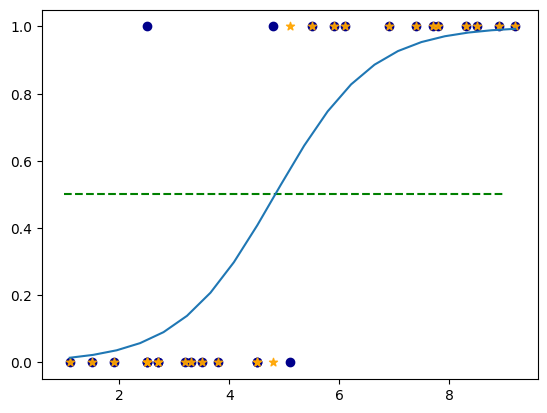

In [122]:
#Sigmoid probability curve
X_axis_values = np.linspace(df['Hours'].min(), df['Hours'].max(), 20)
y_sig = expit(X_axis_values * clf.coef_ + clf.intercept_).ravel()

#Actuals vs predictions
plt.scatter(df['Hours'], df['Outcome'], color='darkblue', marker='o')
plt.scatter(df['Hours'], df['Predict'], color='orange', marker='*', alpha=0.9) #predictions

#50% probability cutoff
plt.hlines(0.5, xmin=1, xmax=9, color='g', linestyles='--')

plt.plot(X_axis_values, y_sig)
plt.show()

## Classification Metrics to Check Model Performance
- there are various metrics to figure out how "accurate" the model is
- confusion matrix --> shows you the predictions split up between True Positive, False Pos, True Neg, False Neg
- accuracy score
- precision
- recall
- f1 score

In [129]:
confusion_matrix(df['Outcome'],df['Predict'])

array([[13,  1],
       [ 2, 11]], dtype=int64)

In [130]:
#accuracy
(13 + 11) / (13 + 1 + 2 + 11)

0.8888888888888888

In [131]:
clf.score(X, y)

0.8888888888888888

In [132]:
recall = 11 / (11 + 2)
precision = (11) / (11+1)
recall, precision

(0.8461538461538461, 0.9166666666666666)

In [134]:
print(classification_report(df['Outcome'], df['Predict']))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.92      0.85      0.88        13

    accuracy                           0.89        27
   macro avg       0.89      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27



In [136]:
print(classification_report(df['Outcome'], df['Predict 80% Thres']))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       1.00      0.69      0.82        13

    accuracy                           0.85        27
   macro avg       0.89      0.85      0.85        27
weighted avg       0.88      0.85      0.85        27



In [144]:
#Extracting probabilities from the model
#you can use the expit function, or their built in function
prob = expit(clf.intercept_ + clf.coef_ * X)
prob_table = pd.DataFrame(clf.predict_proba(X))
prob_table.columns = ['Fail Prob', 'Pass Prob']
prob_table.head()
#[:, 0] #column 0 or column 1

# df.iloc[:, 2]

,Fail Prob,Pass Prob
0,0.934462,0.065538
1,0.425596,0.574404
2,0.865434,0.134566
3,0.015263,0.984737
4,0.820533,0.179467


## Calculating the AUC

In [146]:
df.columns

Index(['Hours', 'Scores', 'Outcome', 'Probability', 'Predict',
       'Predict 60% Thres', 'Predict 80% Thres'],
      dtype='object')

In [148]:
fpr, tpr, thresholds = roc_curve(df['Outcome'], df['Probability']) #y, y_prob of 1s
clf_auc = auc(fpr, tpr)
clf_auc

0.9395604395604397

## Lunch Break until 1pm EST
- codes in the chat and will also post on github during lunch

Q&A: how to remember which metric is which
- **P**recision for **P**redicted values (TP as % of all *predicted* positives)
- **R**ecall for **R**eal values (TP as % of all *real/actual* positives) <-- also known as TPR - True Positive Rate
- **A**ccuracy for **A**ll correct predictions (both TP and TN) as % of **A**ll observations

## Logistic Regression - Car Purchase Dataset

In [159]:
df = pd.read_csv("ExData/car_data.csv", index_col=['User ID'])
df['Purchased'].value_counts(normalize=True) #show as a %

Purchased
0    0.598
1    0.402
Name: proportion, dtype: float64

In [155]:
df[['Purchased', 'Gender']].value_counts(normalize=True)

Purchased  Gender
0          Male      0.301
           Female    0.297
1          Female    0.219
           Male      0.183
Name: proportion, dtype: float64

In [160]:
df.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


In [163]:
df[['Age','AnnualSalary','Purchased']].corr()

,Age,AnnualSalary,Purchased
Age,1.000000,0.166042,0.616036
AnnualSalary,0.166042,1.000000,0.364974
Purchased,0.616036,0.364974,1.000000


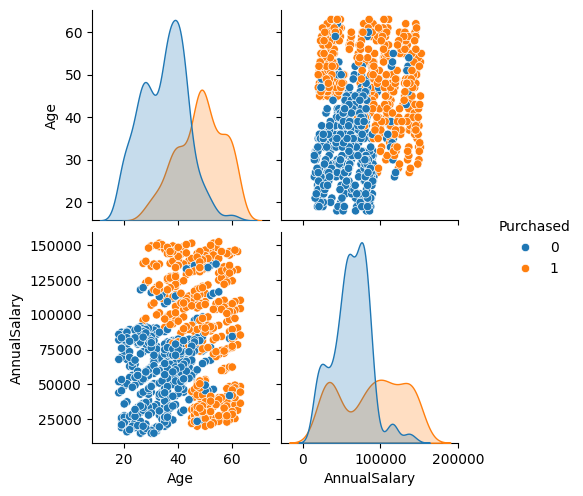

In [161]:
# sns.pairplot(df[['Age', 'AnnualSalary']])
sns.pairplot(df, hue='Purchased')

In [164]:
X = df[['Age']]
y = df['Purchased']
clf_age = LogisticRegression(random_state=0)
clf_age.fit(X,y)

LogisticRegression(random_state=0)

In [165]:
X2 = df[['AnnualSalary']]
clf_salary = LogisticRegression(random_state=0)
clf_salary.fit(X2,y)

LogisticRegression(random_state=0)

In [166]:
clf_age.score(X, y), clf_salary.score(X2, y)

(0.811, 0.598)

In [167]:
confusion_matrix(y, clf_age.predict(X))

array([[528,  70],
       [119, 283]], dtype=int64)

In [168]:
confusion_matrix(y, clf_salary.predict(X2))

array([[598,   0],
       [402,   0]], dtype=int64)

In [170]:
print(classification_report(y, clf_age.predict(X)))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       598
           1       0.80      0.70      0.75       402

    accuracy                           0.81      1000
   macro avg       0.81      0.79      0.80      1000
weighted avg       0.81      0.81      0.81      1000



In [171]:
print(classification_report(y, clf_salary.predict(X2)))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       598
           1       0.00      0.00      0.00       402

    accuracy                           0.60      1000
   macro avg       0.30      0.50      0.37      1000
weighted avg       0.36      0.60      0.45      1000



c:\users\v806013\ds\tools\python3.8\latest\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\v806013\ds\tools\python3.8\latest\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\v806013\ds\tools\python3.8\latest\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Preprocessing Data
- when using logistic regression models --> they don't handle well different scales of data
    - e.g. age is in double digits, salary is in thousands
- StandardScaler --> z-scores
    - (x - avg) / std
- MaxAbsScaler --> x / max(x's)

In [185]:
from sklearn.preprocessing import StandardScaler
df['Salary Z-score'] = (df['AnnualSalary'] - df['AnnualSalary'].mean()) / df['AnnualSalary'].std()
            # zscore = (x-avg) / std
# df.describe()
df['AnnualSalaryStd'] = StandardScaler().fit_transform(df[['AnnualSalary']]) #this is the same thing as above
df.head(3)

,Gender,Age,AnnualSalary,Purchased,Salary Z-score,AnnualSalaryStd
User ID,,,,,,
385,Male,35,20000,0,-1.527734,-1.528498
681,Male,40,43500,0,-0.846344,-0.846767
353,Male,49,74000,0,0.038013,0.038032


In [183]:
X2 = df[['AnnualSalaryStd']]
clf_salary = LogisticRegression(random_state=0)
clf_salary.fit(X2,y)

LogisticRegression(random_state=0)

In [182]:
print(classification_report(y, clf_salary.predict(X2)))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       598
           1       0.86      0.51      0.64       402

    accuracy                           0.77      1000
   macro avg       0.80      0.73      0.74      1000
weighted avg       0.79      0.77      0.76      1000



In [180]:
confusion_matrix(y, clf_salary.predict(X2))

array([[566,  32],
       [197, 205]], dtype=int64)

In [188]:
pd.get_dummies(df['Gender'])['Female']

User ID
385    False
681    False
353    False
895    False
661    False
       ...  
863    False
800     True
407     True
299     True
687     True
Name: Female, Length: 1000, dtype: bool

## Working Session + Coffee until 2:40pm
- join breakout room and click on Ask for Help if you have questions
- try questions 1-3 from: `LogisticRegressionAssignment.ipynb`

Q&A: get dummies - how to get 1/0 instead of True/False
A: `df['col'].str.get_dummies()` or `pd.get_dummies(df['Gender'], dtype=int)`

In [191]:
pd.get_dummies(df['Gender'],dtype=int).head()

,Female,Male
User ID,,
385,0,1
681,0,1
353,0,1
895,0,1
661,0,1


## Takeup Logistic Regression Assignment

In [192]:
df['AnnualSalaryStd'] = StandardScaler().fit_transform(df['AnnualSalary'].values.reshape(-1,1))
df = pd.concat([df, pd.get_dummies(df['Gender'])], axis=1)

In [203]:
Xs = [ ['Age'],
      ['AnnualSalaryStd'],
      ['Female'],
      ['Age', 'AnnualSalaryStd'],
      ['Age', 'AnnualSalaryStd','Female'],
      ['AnnualSalaryStd','Female'],
      ['Age', 'Female']]
y = df['Purchased']

In [200]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import recall_score, precision_score

In [204]:
model_results = []

for x_cols in Xs:
    print(x_cols)
    X = df[x_cols]
    clf = LogisticRegression(random_state=0)
    clf.fit(X,y)
    score = clf.score(X,y) #accuracy
    y_predict = clf.predict(X)

    #other scores
    recall = recall_score(y, y_predict)
    precision = precision_score(y, y_predict)
    
    print(classification_report(y, y_predict))
    print(confusion_matrix(y, y_predict))

    #calc AUC
    y_prob = clf.predict_proba(X)[:,1] #access just prob of being 1's
    fpr, tpr, thresholds = roc_curve(y, y_prob)
    auc_score = auc(fpr, tpr)
    print(f"AUC: {auc_score:.4f}")

    #append results
    model_results.append(  {'AUC':auc_score, 'Accuracy':score, 'Recall':recall, 'Precision':precision, 'X-Cols':x_cols})
    
    print("-" * 100)

['Age']
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       598
           1       0.80      0.70      0.75       402

    accuracy                           0.81      1000
   macro avg       0.81      0.79      0.80      1000
weighted avg       0.81      0.81      0.81      1000

[[528  70]
 [119 283]]
AUC: 0.8631
----------------------------------------------------------------------------------------------------
['AnnualSalaryStd']
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       598
           1       0.86      0.51      0.64       402

    accuracy                           0.77      1000
   macro avg       0.80      0.73      0.74      1000
weighted avg       0.79      0.77      0.76      1000

[[566  32]
 [197 205]]
AUC: 0.6883
----------------------------------------------------------------------------------------------------
['Female']
              precision    recall  

c:\users\v806013\ds\tools\python3.8\latest\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\v806013\ds\tools\python3.8\latest\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\v806013\ds\tools\python3.8\latest\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\v806013\ds\to

In [205]:
results_summary = pd.DataFrame(model_results)
results_summary

,AUC,Accuracy,Recall,Precision,X-Cols
0,0.863095,0.811,0.703980,0.801700,[Age]
1,0.688314,0.771,0.509950,0.864979,[AnnualSalaryStd]
2,0.524060,0.598,0.000000,0.000000,[Female]
3,0.915182,0.828,0.728856,0.823034,"[Age, AnnualSalaryStd]"
4,0.915600,0.834,0.736318,0.831461,"[Age, AnnualSalaryStd, Female]"
5,0.686384,0.772,0.512438,0.865546,"[AnnualSalaryStd, Female]"
6,0.863330,0.811,0.703980,0.801700,"[Age, Female]"
